In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import random
import tensorflow as tf
from tqdm import tqdm
from keras.datasets import mnist

In [ ]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(f'X_train set: {x_train.shape}')
    print(f'Y_train set: {y_train.shape}')
    print(f'X_test set: {x_test.shape}')
    print(f'Y_test set: {y_test.shape}')
    return x_train, y_train, x_test, y_test

In [ ]:
def binarize_set(dataset, threshold=128):
  for x, i in tqdm(zip(dataset, range(dataset.shape[0]))):
    dataset[i] = np.where(x < threshold, 0, 1)
  return dataset

In [ ]:
def calculate_apriori(y_dataset, nr_of_classes=10):
  # creates a new array of size = nr_of_classes with each probability as a valuea of the array
  hist, bins = np.histogram(y_dataset, bins=nr_of_classes)
  return hist/len(y_dataset), hist

In [ ]:
def calculate_likelyhood(x_dataset, y_dataset, y_hist, nr_of_classes):
  # returns an array of shape (10, 28, 28)
  likelyhood = np.zeros((nr_of_classes, x_dataset.shape[1], x_dataset.shape[2]))
  for y in tqdm(range(nr_of_classes)):
    # now count for each pixel in each image
    for i in range(x_dataset.shape[1]):
      for j in range(x_dataset.shape[2]):
        count = sum(np.where(x_dataset[:, i, j] > 0, 1, 0) * np.where(y_dataset == y, 1, 0)) + 1.0
        count /= (y_hist[y] + nr_of_classes)
        likelyhood[y, i, j] = count
  return likelyhood

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

x_train, y_train, x_test, y_test = load_mnist()

X_train set: (60000, 28, 28)
Y_train set: (60000,)
X_test set: (10000, 28, 28)
Y_test set: (10000,)


0

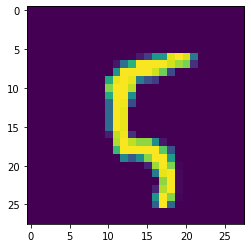

In [ ]:
plt.imshow(x_train[100])
x_train[100][0][0]

60000it [00:00, 136071.27it/s]


0

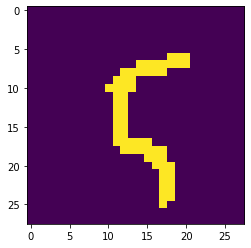

In [ ]:
x_train = binarize_set(x_train, 190)
plt.imshow(x_train[100])
x_train[100][0][0]

In [ ]:
apriori, hist = calculate_apriori(y_train)

In [ ]:
likelyhood = calculate_likelyhood(x_train, y_train, hist, 10)

100%|██████████| 10/10 [01:29<00:00,  8.91s/it]


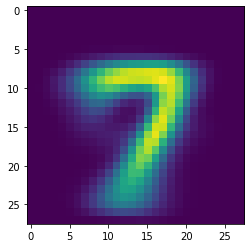

In [ ]:
plt.imshow(likelyhood[7])

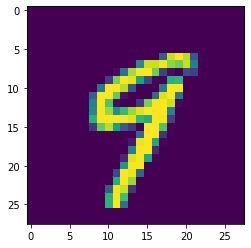

In [ ]:
# predict an image
random_index = random.randint(0, y_test.shape[0] - 1)
plt.imshow(x_test[random_index])

In [ ]:
test_image = np.where(x_test[random_index] < 128, 0, 1)

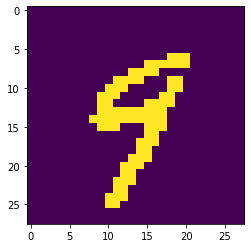

In [ ]:
plt.imshow(test_image)

In [ ]:
def predict_naive_bayes(apriori, likelyhood, y, test_im):
  returned = sum(sum(np.where(test_im > 0, 1, 0) * likelyhood[y])) + apriori[y]
  return returned

In [ ]:
final_prob = np.zeros(10)
for y in range(10):
  # calculate probability for class "y"
  final_prob[y] = predict_naive_bayes(apriori, likelyhood, y, test_image)

Image nr. 17550 from test file
Actual class: 9
Final prediction: 8


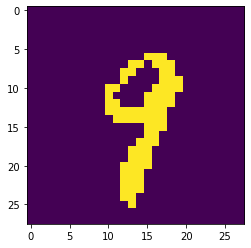

In [ ]:
random_index = random.randint(0, y_train.shape[0] - 1)
# test_image = np.where(x_test[random_index] < 128, 0, 1)
test_image = x_train[random_index]

final_prob = np.zeros(10)
for y in range(10):
  # calculate probability for class "y"
  final_prob[y] = predict_naive_bayes(apriori, likelyhood, y, test_image)

print(f'Image nr. {random_index} from test file')
print(f'Actual class: {y_train[random_index]}')
print(f"Final prediction: {np.argmax(final_prob)}")
plt.imshow(test_image)